Epoch 1/10


c:\Users\herot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.2574 - loss: 1.6795 - val_accuracy: 0.3709 - val_loss: 1.4212
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.3889 - loss: 1.2466 - val_accuracy: 0.3787 - val_loss: 1.4886
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 25s 217ms/step - accuracy: 0.4236 - loss: 1.3036 - val_accuracy: 0.5212 - val_loss: 1.0255
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.4770 - loss: 1.2504 - val_accuracy: 0.5399 - val_loss: 1.0816
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.5738 - loss: 0.9851 - val_accuracy: 0.6159 - val_loss: 0.8545
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.6058 - loss: 0.8498 - val_accuracy: 0.6145 - val_loss: 0.7949
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 196ms/step - accuracy: 0.6300 - loss: 0.7784 - val_accuracy: 0.6936 - val_loss: 0.7087
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.6596 - loss: 0.7247 - val

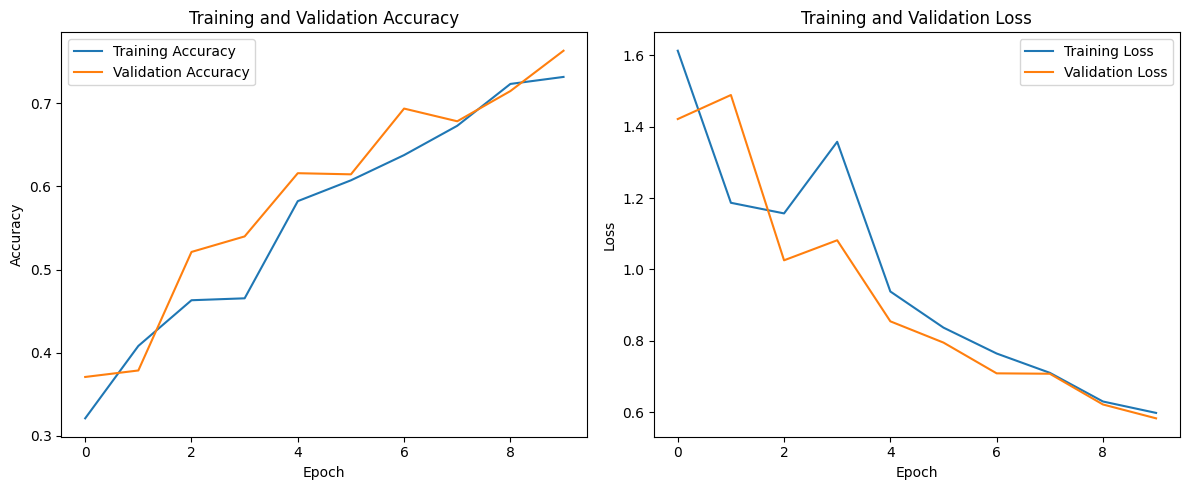

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step


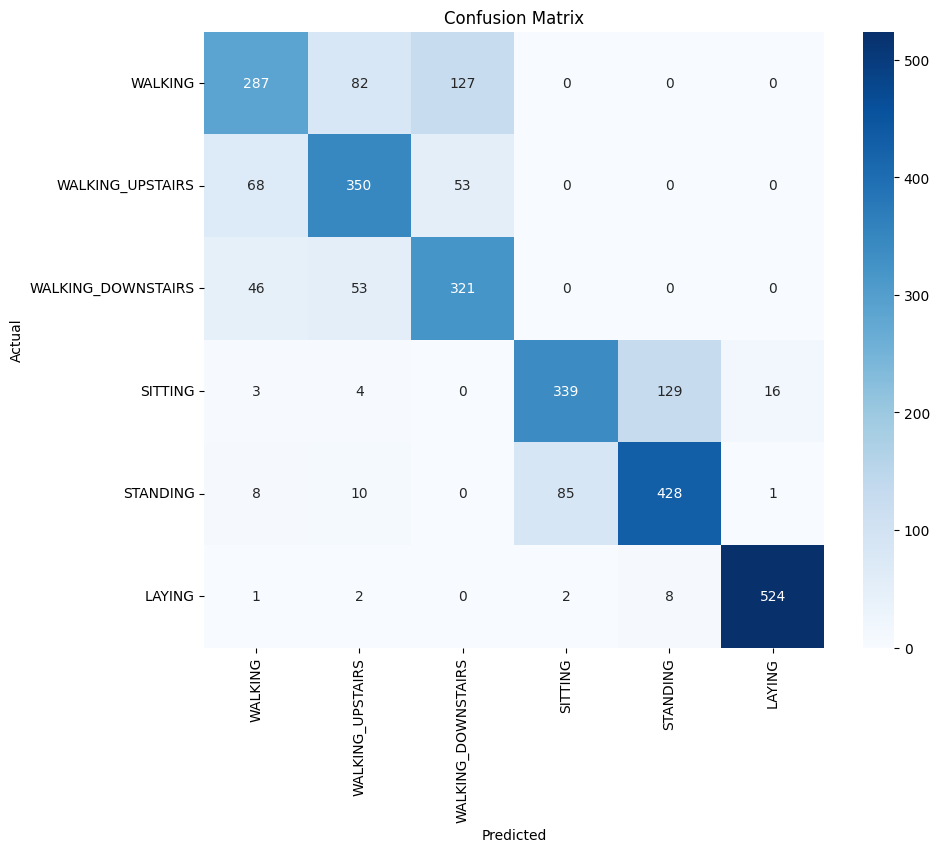

In [6]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix

# Load Data
def load_data():
    # Load training data
    X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
    y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None)

    # Load test data
    X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
    y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None)

    # Load activity labels
    activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', sep='\s+', header=None)

    return X_train, y_train, X_test, y_test, activity_labels

# Preprocess Data
def preprocess_data(X_train, X_test, y_train, y_test):
    # Convert labels to categorical for LSTM
    y_train_categorical = to_categorical(y_train - 1)  # Subtract 1 to make labels start from 0
    y_test_categorical = to_categorical(y_test - 1)

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical

# Define and Compile LSTM Model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Plot Training and Validation Curves
def plot_training_curves(history):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_curves.png')  # Save the figure
    plt.show()

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, activity_labels):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels[1], yticklabels=activity_labels[1])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png')  # Save the figure
    plt.show()

# Main Function
def main():
    # Step 1: Load Data
    X_train, y_train, X_test, y_test, activity_labels = load_data()

    # Step 2: Preprocess Data
    X_train_lstm, X_test_lstm, y_train_categorical, y_test_categorical = preprocess_data(X_train, X_test, y_train, y_test)

    # Step 3: Define LSTM Model
    input_shape = (X_train_lstm.shape[1], 1)  # Shape of input data (timesteps, features)
    num_classes = y_train_categorical.shape[1]  # Number of output classes
    lstm_model = create_lstm_model(input_shape, num_classes)

    # Step 4: Train LSTM Model
    history = lstm_model.fit(X_train_lstm, y_train_categorical, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test_categorical))

    # Step 5: Generate Figures
    # Plot training and validation curves
    plot_training_curves(history)

    # Plot confusion matrix
    y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1) + 1  # Add 1 to match original labels
    plot_confusion_matrix(y_test, y_pred, activity_labels)

    # Plot LSTM model architecture
    plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# Run the Program
if __name__ == "__main__":
    main()

c:\Users\herot\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.2411 - loss: 1.6396 - val_accuracy: 0.2311 - val_loss: 2.2466


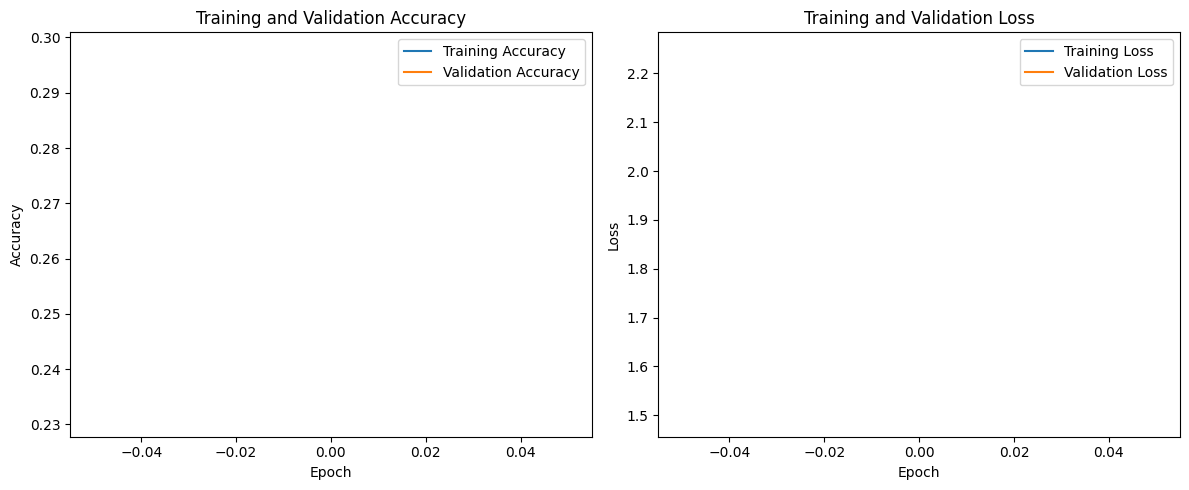

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


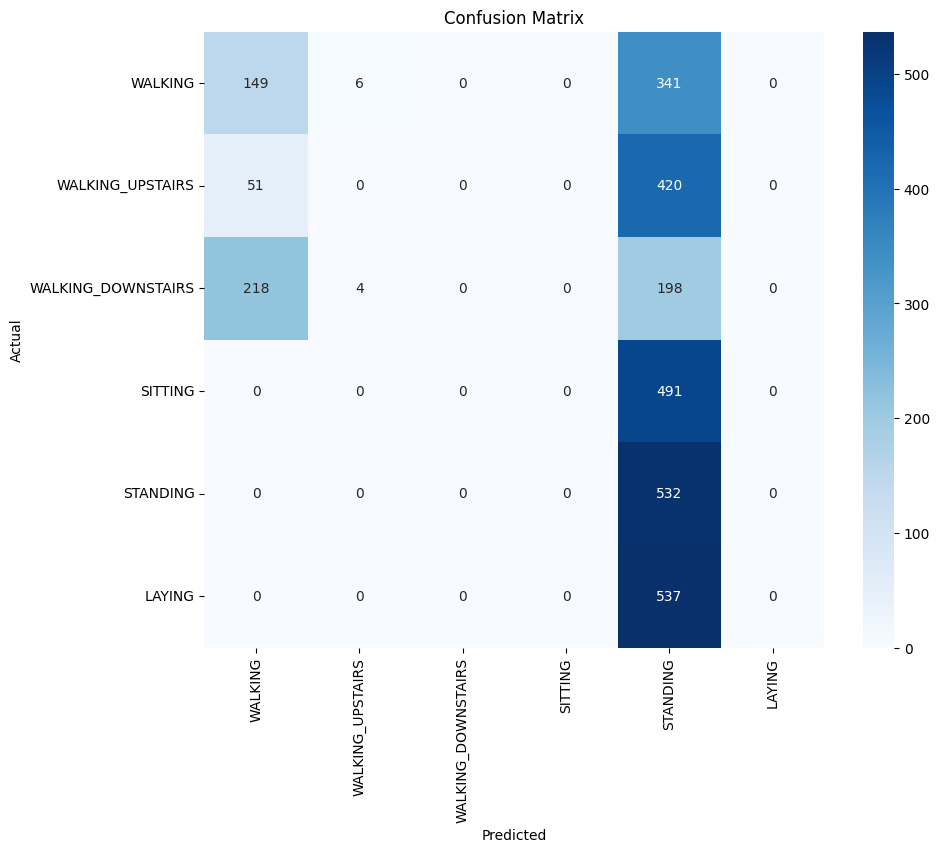

✅ LSTM model diagram saved as 'lstm_model.png'
